In [17]:
import os

# os.environ["PYSYN_CDBS"] = "/home/ruizhew/POSEIDON/inputs/stellar_grids/"
# os.environ["POSEIDON_input_data"] = "/home/ruizhew/POSEIDON/inputs/"

In [18]:
from __future__ import absolute_import, unicode_literals, print_function
from POSEIDON.high_res import (
    fast_filter,
    loglikelihood_sysrem,
    get_rot_kernel,
    fit_uncertainties,
    fit_uncertainties_and_remove_outliers,
)
import math, os
import numpy as np
import pickle
import pickle
from scipy import constants
from numba import jit
from astropy.io import fits
from scipy import interpolate
from POSEIDON.core import (
    create_star,
    create_planet,
    define_model,
    make_atmosphere,
    read_opacities,
    wl_grid_constant_R,
    wl_grid_line_by_line,
    compute_spectrum,
)
from POSEIDON.constants import R_Sun
from POSEIDON.visuals import plot_stellar_flux
from POSEIDON.constants import R_J, M_J
import numpy as np
from spectres import spectres
from tqdm import tqdm
from multiprocessing import Pool
import time
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d, median_filter
from sklearn.decomposition import TruncatedSVD, PCA

In [19]:
from POSEIDON.utility import read_high_res_data
import h5py

data = h5py.File("./data/WASP-121b.h5", "r")

In [20]:
def PCA_decompose(matrix, n_components=None, return_variance=False):
    # if no components given, break down into all of them
    if n_components == None:
        n_components = np.shape(matrix)[1]
    pca = TruncatedSVD(n_components=n_components)
    coefficients = pca.fit_transform(matrix)
    pcs = pca.components_
    # if return_variance:
    #     explained_variance = pca.explained_variance_ratio_
    #     return pcs, coefficients, explained_variance
    # else:
    return pcs, coefficients, n_components


"""
Function that, given the components and coefficients, rebuilds the first N components of a matrix

    Input: The principal components and coefficients as outputted by PCA_decompose, and the number of components to be used to rebuild it

    Output: the reconstructed first N components of a matrix

"""


def PCA_rebuild(pcs, coefficients, n_pcs):
    comps = pcs[:n_pcs, :]
    rebuilt = 0.0
    for i in range(n_pcs):
        rebuilt += comps[i, :][None, :] * coefficients[:, i][:, None]

    return rebuilt

In [21]:
flux = data["blue/flux"][:][0]

In [22]:
pcs, N_components_removed, N_components_removed = PCA_decompose(flux.T, n_components=10)

In [23]:
rebuild_0 = PCA_rebuild(pcs, coefficients, N_components_removed)

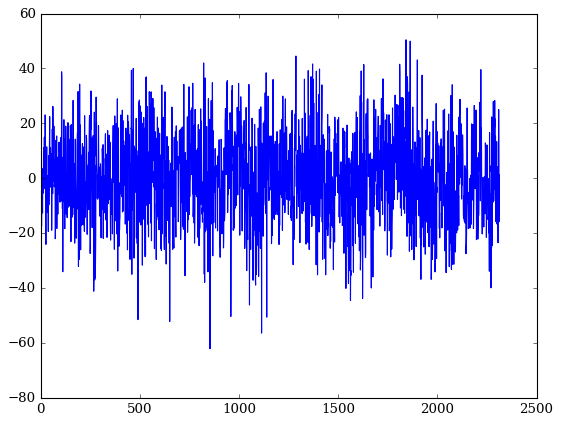

In [16]:
plt.plot((flux - (rebuild_0.T))[0])

In [ ]:
data.close()